# Problem description
We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

1 represents low damage
2 represents a medium amount of damage
3 represents almost complete destruction

# Features
The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

# Performance metric
We are predicting the level of damage from 1 to 3. The level of damage is an ordinal variable meaning that ordering is important. This can be viewed as a classification or an ordinal regression problem. (Ordinal regression is sometimes described as an problem somewhere in between classification and regression.)

To measure the performance of our algorithms, we'll use the Classification Accuracy and F1 score which balances the precision and recall of a classifier. Traditionally, the F1 score is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the micro averaged F1 score.

# Models
For this project we will use the following models for predicition:
Decision Tree Classifier, Random Forest
Gaussian Naive Bayes
AdaBoost
XGBoost

---
## Importing Essential Libraries

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.preprocessing import LabelEncoder
sb.set() # set the default Seaborn style for graphics

---
## Importing Datasets

In [4]:
train_data = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')
train_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


---
## Check the shapes of imported datasets

In [6]:
rows = train_data.shape[0] 
cols = train_data.shape[1] 

print("There are a total of {} rows and {} columns in the train_data dataset.".format(rows, cols))

There are a total of 260601 rows and 39 columns in the train_data dataset.


In [7]:
rows = train_labels.shape[0] 
cols = train_labels.shape[1] 

print("There are a total of {} rows and {} columns in the train_labels dataset.".format(rows, cols))

There are a total of 260601 rows and 2 columns in the train_labels dataset.


---
## Cleaning and Preparing datasets

### Check the variables (and their types) in the dataset using the dtypes attribute

In [8]:
train_data.dtypes.sort_index()

age                                        int64
area_percentage                            int64
building_id                                int64
count_families                             int64
count_floors_pre_eq                        int64
foundation_type                           object
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
ground_floor_type                         object
has_secondary_use                          int64
has_secondary_use_agriculture              int64
has_secondary_use_gov_office               int64
has_secondary_use_health_post              int64
has_secondary_use_hotel                    int64
has_secondary_use_industry                 int64
has_secondary_use_institution              int64
has_secondary_use_other                    int64
has_secondary_use_rental                   int64
has_secondary_use_school                   int64
has_secondary_use_us

### Check for duplicates
### source: https://medium.com/@kasiarachuta/dealing-with-duplicates-in-pandas-dataframe-789894a28911

In [9]:
train_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
260596    False
260597    False
260598    False
260599    False
260600    False
Length: 260601, dtype: bool

In [10]:
print('Duplicates in train: {}'.format(sum(train_data.duplicated())))

Duplicates in train: 0


#### Findings : No duplicates in the train_data detected, therefore no need for drops

### Check for missing data(NaN)

In [11]:
print('Missing values in train_data: {}'.format(train_data.isnull().values.sum()))

Missing values in train_data: 0


### Check for other missing data(n/a", "na", "--")

In [12]:
missing_values = ["n/a", "na", "--"]
check_missing_df = pd.read_csv("train_values.csv", na_values = missing_values)
print('Other missing values in train_data: {}'.format(check_missing_df.isnull().values.sum()))

Other missing values in train_data: 0


#### Findings: train_data does not have missing values, therefore no replacement is required

---
## Do the same for train_labels dataset

In [13]:
print('Duplicates in test: {}'.format(sum(train_labels.duplicated())))

Duplicates in test: 0


In [14]:
missing_values = ["n/a", "na", "--"]
check_missing_df = pd.read_csv("train_labels.csv", na_values = missing_values)
print('Other missing values in train_labels: {}'.format(check_missing_df.isnull().values.sum()))

Other missing values in train_labels: 0


#### Findings: train_labels does not have missing values, therefore no replacement is required

---
## Label Encoding
Some variables in the dataset contain text or categorical values (basically non-numerical values). As our machine learning algorithms expect numerical values, we need to convert the categorical i.e text features to its numeric representation using label encoding.
### source: https://pbpython.com/categorical-encoding.html

In [15]:
label_encoder = LabelEncoder()
train_data['land_surface_condition'] = label_encoder.fit_transform(train_data['land_surface_condition'])
train_data['roof_type'] = label_encoder.fit_transform(train_data['roof_type'])
train_data['ground_floor_type'] = label_encoder.fit_transform(train_data['ground_floor_type'])
train_data['other_floor_type'] = label_encoder.fit_transform(train_data['other_floor_type'])
train_data['position'] = label_encoder.fit_transform(train_data['position'])
train_data['roof_type'] = label_encoder.fit_transform(train_data['roof_type'])
train_data['foundation_type'] = label_encoder.fit_transform(train_data['foundation_type'])
train_data['plan_configuration'] = label_encoder.fit_transform(train_data['plan_configuration'])
train_data['legal_ownership_status'] = label_encoder.fit_transform(train_data['legal_ownership_status'])
train_data['count_floors_pre_eq'] = label_encoder.fit_transform(train_data['count_floors_pre_eq'])

### check data for correctness

In [16]:
pd.set_option('display.max_columns', None)
train_data.dtypes.sort_index()

age                                       int64
area_percentage                           int64
building_id                               int64
count_families                            int64
count_floors_pre_eq                       int64
foundation_type                           int32
geo_level_1_id                            int64
geo_level_2_id                            int64
geo_level_3_id                            int64
ground_floor_type                         int32
has_secondary_use                         int64
has_secondary_use_agriculture             int64
has_secondary_use_gov_office              int64
has_secondary_use_health_post             int64
has_secondary_use_hotel                   int64
has_secondary_use_industry                int64
has_secondary_use_institution             int64
has_secondary_use_other                   int64
has_secondary_use_rental                  int64
has_secondary_use_school                  int64
has_secondary_use_use_police            

---
## First Model : Decision Tree Classifier
A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

Decision trees are built using a heuristic called recursive partitioning. This approach is also commonly known as divide and conquer because it splits the data into subsets, which are then split repeatedly into even smaller subsets, and so on and so forth until the process stops when the algorithm determines the data within the subsets are sufficiently homogenous, or another stopping criterion has been met.

### Problem: Which predictor is the best in predicting Damage?

Response Variable : **Damage**     
Predictor Feature : **"geo_level_1_id", "geo_level_2_id", "age", "height_percentage", "has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag", "count_families", "has_superstructure_adobe_mud", 'foundation_type'**

In [17]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import graphviz
import time
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score

---
## Features Selection
In this dataset, we have a mixture of data types(continuous and categorical variables).
In order to select features for prediction accurately, we will perform **Correlations Test via heatmap for continuous variables**
and **Chi Test for categorical variables**.

### Correlations between all of the continuous variables and damage grade

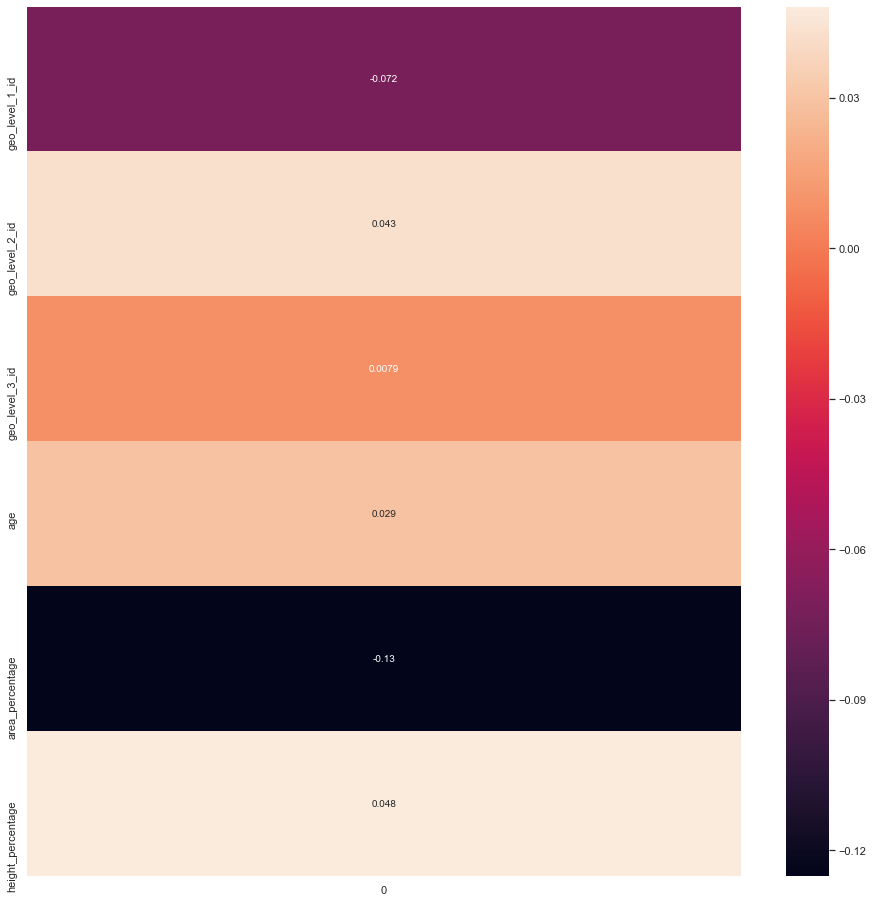

In [18]:
cont_list = ["geo_level_1_id",
             "geo_level_2_id", 
             "geo_level_3_id", 
             "age", 
             "area_percentage", 
             "height_percentage"]
plt.figure(figsize=(16,16))
correlations = train_data[cont_list].corrwith(train_labels["damage_grade"])
ax = sb.heatmap(pd.DataFrame(correlations), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 
plt.show()

### Findings

**"geo_level_1_id", "geo_level_2_id", "age", "height_percentage" and "area_percentage"** will be chosen as predictors as they have relatively good positive and negative correlation with damage grade

---
### Performing Chi-Squared Test for categorical variables

In the case of classification problems where input variables are also categorical, we can use statistical tests to determine whether the output variable is dependent or independent of the input variables. If independent, then the input variable is a candidate for a feature that may be irrelevant to the problem and removed from the dataset.

The Pearson’s chi-squared statistical hypothesis is an example of a test for independence between categorical variables.

In [19]:
# exclude continuous variables for chi test 
columns = ['building_id',
           "geo_level_1_id",
           "geo_level_2_id", 
           "geo_level_3_id", 
           "age",
           "area_percentage", 
           "height_percentage"]
train_chi2 = train_data.copy()
train_chi2.drop(columns, inplace=True, axis=1)
train_chi2

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,1,2,2,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2,2,0,0,3,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,2,2,0,0,3,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
4,2,2,2,0,0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0,0,2,0,0,0,2,7,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
260597,1,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
260598,2,2,2,1,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
260599,1,2,2,2,2,2,0,2,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


In [20]:
X = train_chi2
y = pd.DataFrame(train_labels["damage_grade"].astype('category'))

In [21]:
chi_scores = chi2(X,y)

### Chi Test 

In [22]:
print(chi_scores)

(array([2.33982398e+03, 1.15744982e+02, 4.20333678e+02, 1.29763976e+04,
       2.36566871e+04, 2.60579525e+02, 1.49771597e+02, 3.78257508e+02,
       1.34014554e+03, 6.96960184e+03, 1.10840457e+03, 9.36793309e+02,
       9.87065751e+02, 1.89494144e+04, 9.77290073e+02, 9.81491828e+02,
       8.72551848e+03, 1.44112970e+04, 2.79470979e+02, 1.21306115e+02,
       1.68949183e+02, 1.48566331e+03, 5.40461154e+02, 2.93730438e+03,
       2.63534154e+03, 2.92860658e+02, 5.58052618e+01, 4.54947175e+01,
       1.97403822e+01, 2.97878652e+01, 1.58628971e+00, 7.17131499e+01]), array([0.00000000e+000, 7.35015477e-026, 5.31742664e-092, 0.00000000e+000,
       0.00000000e+000, 2.60540471e-057, 3.00269370e-033, 7.28493669e-083,
       9.79699074e-292, 0.00000000e+000, 2.05591307e-241, 3.78370751e-204,
       4.58559420e-215, 0.00000000e+000, 6.08355048e-213, 7.44316360e-214,
       0.00000000e+000, 0.00000000e+000, 2.05896002e-061, 4.55734496e-027,
       2.05660617e-037, 0.00000000e+000, 4.36869397e-1

In [23]:
p_values = pd.Series(chi_scores[0],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

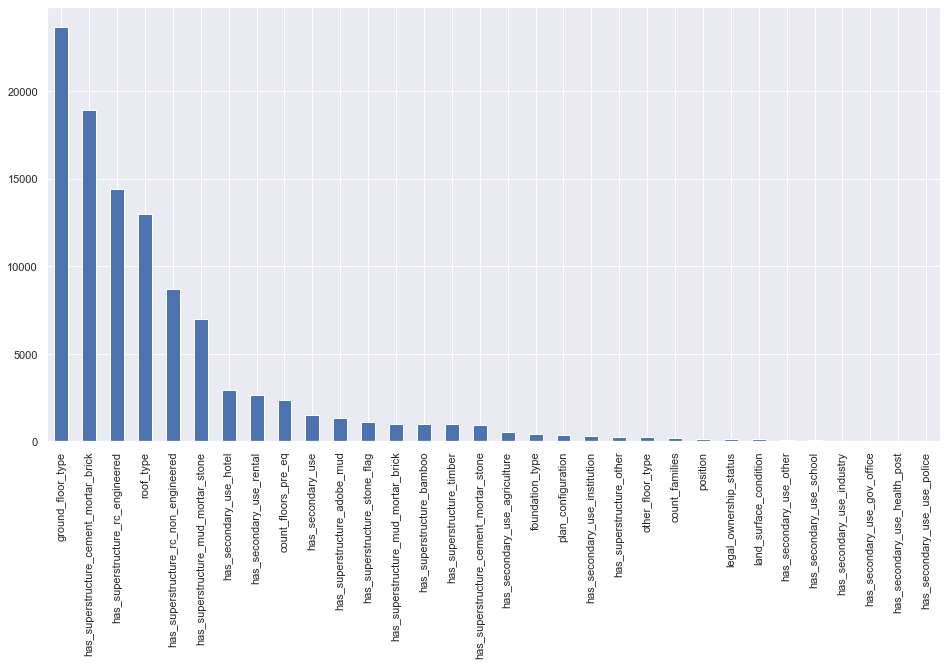

In [24]:
plt.figure(figsize=(16,8))
p_values.plot.bar()
plt.show()

### Findings

Based on the Chi Test calculation and values, we can see that  **Damage Grade** are highly dependent on **"ground_floor_type", "has_superstructure_cement_mortar_brick", "has_superstructure_rc_engineered", 'roof_type'**, as such, they will be selected for prediction.

### Extract Response and Predictors

In [25]:
predictors = ["geo_level_1_id", "geo_level_2_id", "age", "height_percentage", "area_percentage", "ground_floor_type", "has_superstructure_cement_mortar_brick", "has_superstructure_rc_engineered", 'roof_type']
y = pd.DataFrame(train_labels["damage_grade"].astype('category'))
X = pd.DataFrame(train_data[predictors])

---
## Split the Dataset into Train and Test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Decision Tree using Train Data
After some trial and error, max_depth of 10 is the optimal value as it provides good accuracy and yields the minimum overfitting of the model.

In [27]:
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
print("F1 Score \t:", f1_score(y_test, y_test_pred, average='micro'))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6881043745203377

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6817213790986358

F1 Score 	: 0.6817213790986358


---
## Plot the Confusion Matrix for Train and Test

### Confusion Matrix for Train

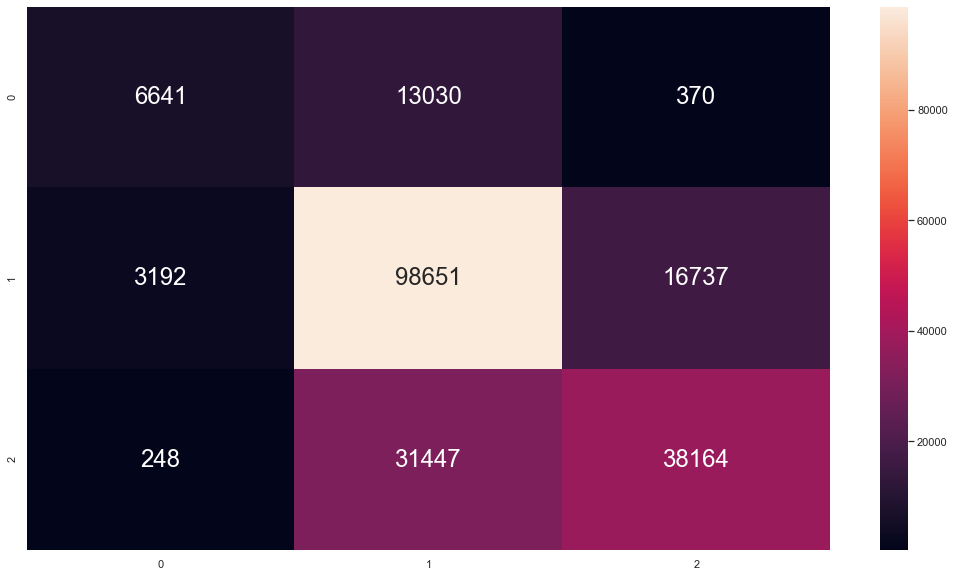

In [28]:
plt.figure(figsize=(18,10))
ax = sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 24})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Confusion Matrix for Test

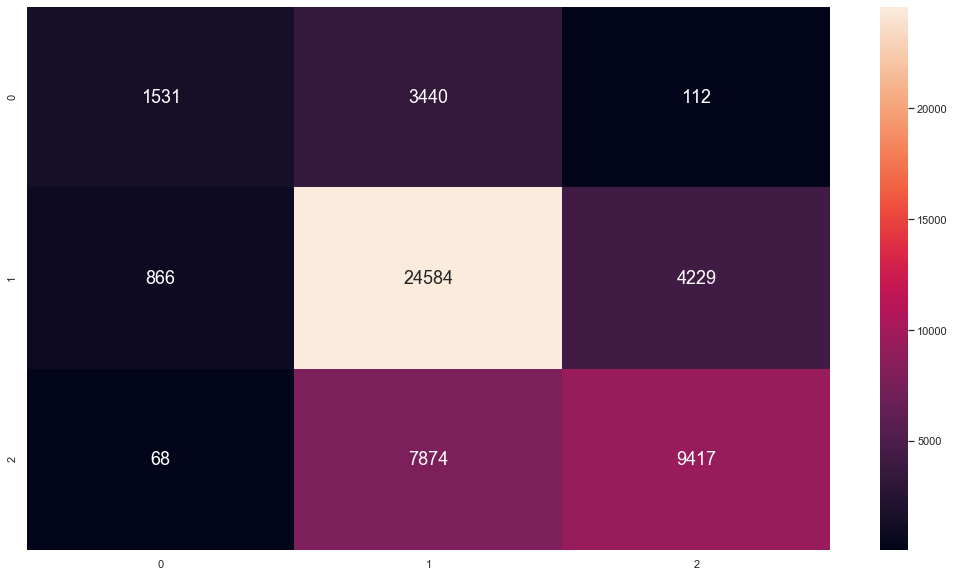

In [29]:
plt.figure(figsize=(18,10))
ax = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [30]:
# Plot the Decision Tree
'''treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)'''

'treedot = export_graphviz(dectree,                                      # the model\n                          feature_names = X_train.columns,              # the features \n                          out_file = None,                              # output file\n                          filled = True,                                # node colors\n                          rounded = True,                               # make pretty\n                          special_characters = True)                    # postscript\n\ngraphviz.Source(treedot)'

#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [31]:
# Summary Statistics for Response
y.describe()

,damage_grade
count,260601
unique,3
top,2
freq,148259


In [32]:
# Summary Statistics for Predictors
X.describe()

,geo_level_1_id,geo_level_2_id,age,height_percentage,area_percentage,ground_floor_type,has_superstructure_cement_mortar_brick,has_superstructure_rc_engineered,roof_type
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,26.535029,5.434365,8.018051,0.492481,0.075268,0.015859,0.360482
std,8.033617,412.710734,73.565937,1.918418,4.392231,1.028436,0.263824,0.124932,0.595595
min,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,10.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,15.000000,5.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,30.000000,6.000000,9.000000,0.000000,0.000000,0.000000,1.000000
max,30.000000,1427.000000,995.000000,32.000000,100.000000,4.000000,1.000000,1.000000,2.000000


In [33]:
X_test.head(10)

,geo_level_1_id,geo_level_2_id,age,height_percentage,area_percentage,ground_floor_type,has_superstructure_cement_mortar_brick,has_superstructure_rc_engineered,roof_type
197862,26,36,5,3,6,0,0,0,1
141275,20,261,15,5,6,0,1,0,1
239830,22,1101,5,6,4,0,0,0,0
182637,6,1108,10,8,8,0,0,0,0
243289,16,352,20,6,9,1,0,0,0
90173,11,660,10,7,15,2,1,0,2
213323,20,672,75,6,5,0,0,0,0
107045,4,1276,5,6,9,0,0,0,1
133751,4,369,10,4,6,3,0,0,0
207093,10,417,20,6,4,0,0,0,0


## Selecting 5 entries from test set

In [34]:
pred_data = X_test.iloc[0:5]

---
## Predict Response corresponding to Predictors

In [35]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(pred_data)

y_pred = dectree.predict(X_pred)
print(y_pred)

[2 2 2 2 2]


In [36]:
pred_data_with_id = pd.concat([train_data[["building_id"]], pred_data], axis = 1)
pred_data_with_id = pred_data_with_id.dropna()
pred_data_with_id = pred_data_with_id.astype(int)
actual_grade = train_labels[train_labels["building_id"].isin(pred_data_with_id["building_id"])]
actual_grade

,building_id,damage_grade
141275,446960,2
182637,408927,2
197862,231081,1
239830,210328,1
243289,54752,2


## Summarize the Actuals and Predictions

In [37]:
y_pred = pd.DataFrame(y_pred, columns = ["Predicted_Damage_Grade"], index = actual_grade.index)
actual_data = pd.concat([pred_data_with_id["building_id"],actual_grade["damage_grade"], y_pred], axis = 1)
actual_data.dropna()
actual_data = actual_data.astype(int)
actual_data

,building_id,damage_grade,Predicted_Damage_Grade
141275,446960,2,2
182637,408927,2,2
197862,231081,1,2
239830,210328,1,2
243289,54752,2,2


## Prediction of Class Probabilities

In case of any Classification Model, we should check the Class Probabilities along with the final Class Predictions.

In [38]:
y_prob = dectree.predict_proba(X_pred)
np.set_printoptions(precision = 3)
print(y_prob)

[[0.305 0.589 0.106]
 [0.288 0.698 0.014]
 [0.174 0.733 0.093]
 [0.02  0.879 0.101]
 [0.045 0.776 0.179]]


## Findings of the Decision Tree Model

Let's start by looking at the distribution of Response

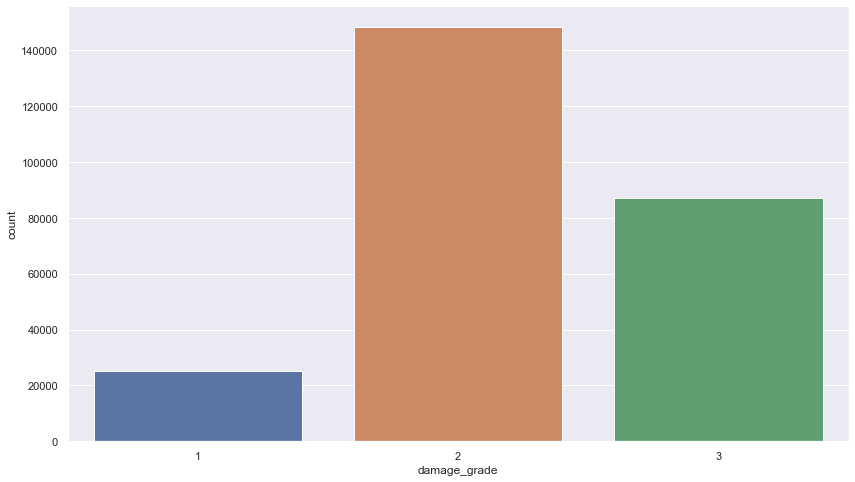

In [39]:
# Draw the distribution of Response
plt.figure(figsize=(14,8))
sb.countplot(train_labels["damage_grade"])
plt.show()

In [40]:
print(train_labels["damage_grade"].value_counts())

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


### Findings

**The model is rather inaccurate in predicting damage grade 1 and 3, as the data is imbalanced with 56.8% of the data being Damage Grade "2" alone. As such, the model is biased towards Damage Grade "2", having the tendency of predicting 2 most of the time. Only 9.64% of the data being Damage Grade "1", as such, the probability of predicting "1" is slim.**

One solution to eliminate imbalanced data is to sample the data manually, such as training the model with the equal number of Damage Grade respectively.

---
## Second Model : Decision Tree Classifier (With Data Sampling)

### Problem: Which predictors are the best in predicting Damage?

Response Variable : **Damage**     
Predictor Feature : **"geo_level_1_id", "geo_level_2_id", "age", "height_percentage", "has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag", "count_families", "has_superstructure_adobe_mud", 'foundation_type'**

In [41]:
train_high = train_data[train_labels.damage_grade == 3]
train_medium = train_data[train_labels.damage_grade == 2]
train_low = train_data[train_labels.damage_grade == 1]

### Sampling datapoint of each damage grade evenly
Sampling value of 25000 is used as the maximum count of damage grade "1" is 25124. 

In [42]:
train_high = train_high.sample(25000)
train_medium = train_medium.sample(25000)
train_low = train_low.sample(25000)

In [43]:
train_sampled = pd.concat([train_high, train_medium,train_low], ignore_index = True, sort = False)
train_sampled = train_sampled.sample(frac=1)
train_sampled.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
55451,807713,4,388,5390,0,0,3,2,0,2,1,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
511,980616,21,1426,5317,1,15,7,4,2,2,1,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0
62055,36107,12,667,10894,1,25,6,5,2,2,0,0,1,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
52166,692799,7,322,5410,1,5,5,5,2,2,0,0,1,2,2,1,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
30017,730079,4,334,10010,2,30,2,7,0,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


In [44]:
train_sampled.sample(75000)
train_sampled

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
55451,807713,4,388,5390,0,0,3,2,0,2,1,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
511,980616,21,1426,5317,1,15,7,4,2,2,1,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0
62055,36107,12,667,10894,1,25,6,5,2,2,0,0,1,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
52166,692799,7,322,5410,1,5,5,5,2,2,0,0,1,2,2,1,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
30017,730079,4,334,10010,2,30,2,7,0,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28307,479447,13,311,7516,1,30,5,5,2,2,0,0,3,2,7,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
9567,331461,4,512,8291,1,20,13,5,2,2,1,0,3,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,1
27021,474226,4,605,7329,1,10,6,6,0,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
4418,252622,26,991,2170,0,15,7,2,2,4,0,0,0,2,2,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [45]:
train_sampled['damage_grade'] = train_sampled['building_id'].map(train_labels.set_index('building_id')['damage_grade'])
train_sampled

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
55451,807713,4,388,5390,0,0,3,2,0,2,1,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
511,980616,21,1426,5317,1,15,7,4,2,2,1,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,3
62055,36107,12,667,10894,1,25,6,5,2,2,0,0,1,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
52166,692799,7,322,5410,1,5,5,5,2,2,0,0,1,2,2,1,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
30017,730079,4,334,10010,2,30,2,7,0,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28307,479447,13,311,7516,1,30,5,5,2,2,0,0,3,2,7,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2
9567,331461,4,512,8291,1,20,13,5,2,2,1,0,3,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,1,3
27021,474226,4,605,7329,1,10,6,6,0,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2
4418,252622,26,991,2170,0,15,7,2,2,4,0,0,0,2,2,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3


In [46]:
print('Duplicates in train: {}'.format(sum(train_sampled.duplicated())))

Duplicates in train: 0


In [47]:
predictors = ["geo_level_1_id", "geo_level_2_id", "age", "height_percentage", "area_percentage", "ground_floor_type", "has_superstructure_cement_mortar_brick", "has_superstructure_rc_engineered", 'roof_type']
y = pd.DataFrame(train_sampled["damage_grade"].astype('category'))
X = pd.DataFrame(train_sampled[predictors])

In [48]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size = 0.20)

In [49]:
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(XS_train, ys_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(XS_train)
y_test_pred = dectree.predict(XS_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(XS_train, ys_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(XS_test, ys_test))
print()

print("F1 Score \t:", f1_score(ys_test, y_test_pred, average='micro'))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6724666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6593333333333333

F1 Score 	: 0.6593333333333333


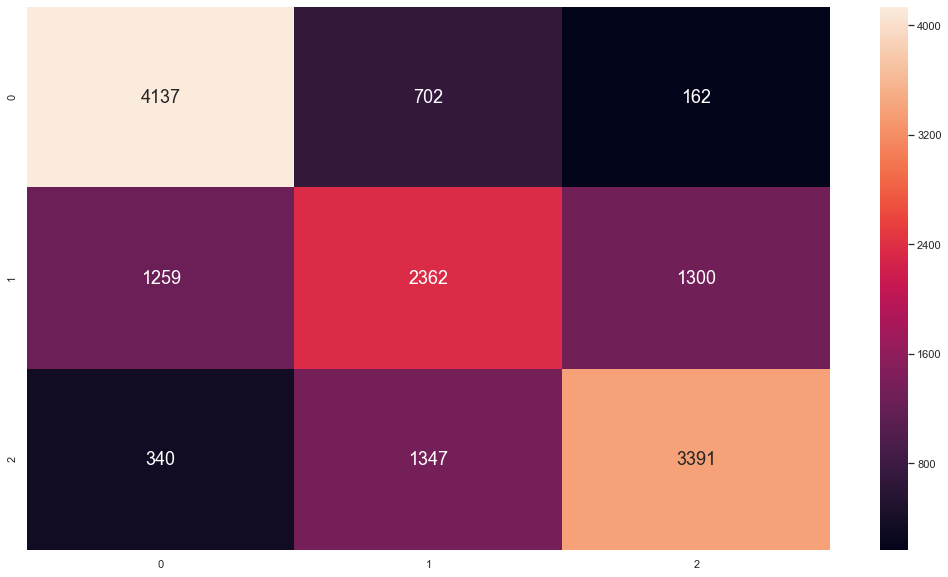

In [50]:
plt.figure(figsize=(18,10))
ax = sb.heatmap(confusion_matrix(ys_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Findings

As compared to the first model, the classification accuracy of this model after data sampling did not improved, however based on the confusion matrix of this test set, the model does not have bias with any damage grade. As such, this model is deemed, in my opinion, much preferred than the first model.

---
## Tree Feature Importances

#### https://stackoverflow.com/questions/47692386/how-do-i-view-model-feature-importances-output-with-the-names-of-the-features

In [51]:
tree = DecisionTreeClassifier().fit(X, y)
results = list(zip(X, tree.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
importance

,Feature,Importance
0,geo_level_1_id,0.212615
1,geo_level_2_id,0.193400
4,area_percentage,0.175408
2,age,0.154482
8,roof_type,0.108769
3,height_percentage,0.108534
5,ground_floor_type,0.027309
6,has_superstructure_cement_mortar_brick,0.018121
7,has_superstructure_rc_engineered,0.001363


#### https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names

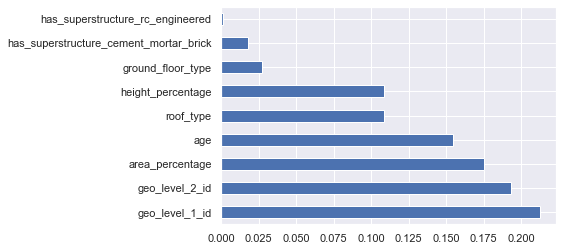

In [52]:
(pd.Series(tree.feature_importances_, index=X.columns)
   .nlargest(9)
   .plot(kind='barh')) 

## Which predictors are the best in predicting Damage?

Based on the feature importances of this model, we know that geo_level_1_id and geo_level_2_id are best in predicting damage grade. It makes sense as the some geographic regions experience higher earthquake magnitude scale than the rest. We can also observe that the area, age and type of roof also plays a part in the Damage Grade of the building.

## Finding sample data

In [53]:
# using sample data to find the data that is affecting damage grade
train_sampled.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
55451,807713,4,388,5390,0,0,3,2,0,2,1,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
511,980616,21,1426,5317,1,15,7,4,2,2,1,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,3
62055,36107,12,667,10894,1,25,6,5,2,2,0,0,1,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
52166,692799,7,322,5410,1,5,5,5,2,2,0,0,1,2,2,1,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
30017,730079,4,334,10010,2,30,2,7,0,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2


## Finding the interquartile range of the data

In [54]:
tdataQ1 = train_sampled.quantile(0.25)
tdataQ3 = train_sampled.quantile(0.75)
tdataIQR = tdataQ3 - tdataQ1

tdataOutlier1 = tdataQ1 - (1.5 * tdataIQR)
tdataOutlier2 = tdataQ3 + (1.5 * tdataIQR)

tdataOutlier2.age

55.0

## Reduce the number of outliers

In [55]:
# Choosing data of age less than 60 to reduce the number of outliers
sdata60 = train_sampled[train_sampled.age<=60]

## Showing the details when there are lesser outliers

In [56]:
# putting the variables into 1 variable to analyse the data
spredictors = pd.DataFrame(sdata60[['area_percentage','age','height_percentage','roof_type','damage_grade']])
spredictors1 = pd.DataFrame(sdata60[['area_percentage','age','height_percentage','roof_type','damage_grade']])
spredictors

,area_percentage,age,height_percentage,roof_type,damage_grade
55451,3,0,2,1,1
511,7,15,4,1,3
62055,6,25,5,0,1
52166,5,5,5,0,1
30017,2,30,7,0,2
...,...,...,...,...,...
28307,5,30,5,0,2
9567,13,20,5,1,3
27021,6,10,6,0,2
4418,7,15,2,0,3


In [57]:
spredictors.describe()

,area_percentage,age,height_percentage,roof_type,damage_grade
count,72062.000000,72062.000000,72062.000000,72062.000000,72062.000000
mean,8.439386,16.370348,5.323430,0.472038,1.985970
std,4.998573,13.878580,2.082401,0.708486,0.819162
min,1.000000,0.000000,2.000000,0.000000,1.000000
25%,5.000000,5.000000,4.000000,0.000000,1.000000
50%,7.000000,15.000000,5.000000,0.000000,2.000000
75%,10.000000,25.000000,6.000000,1.000000,3.000000
max,96.000000,60.000000,32.000000,2.000000,3.000000


IndexError: list index out of range

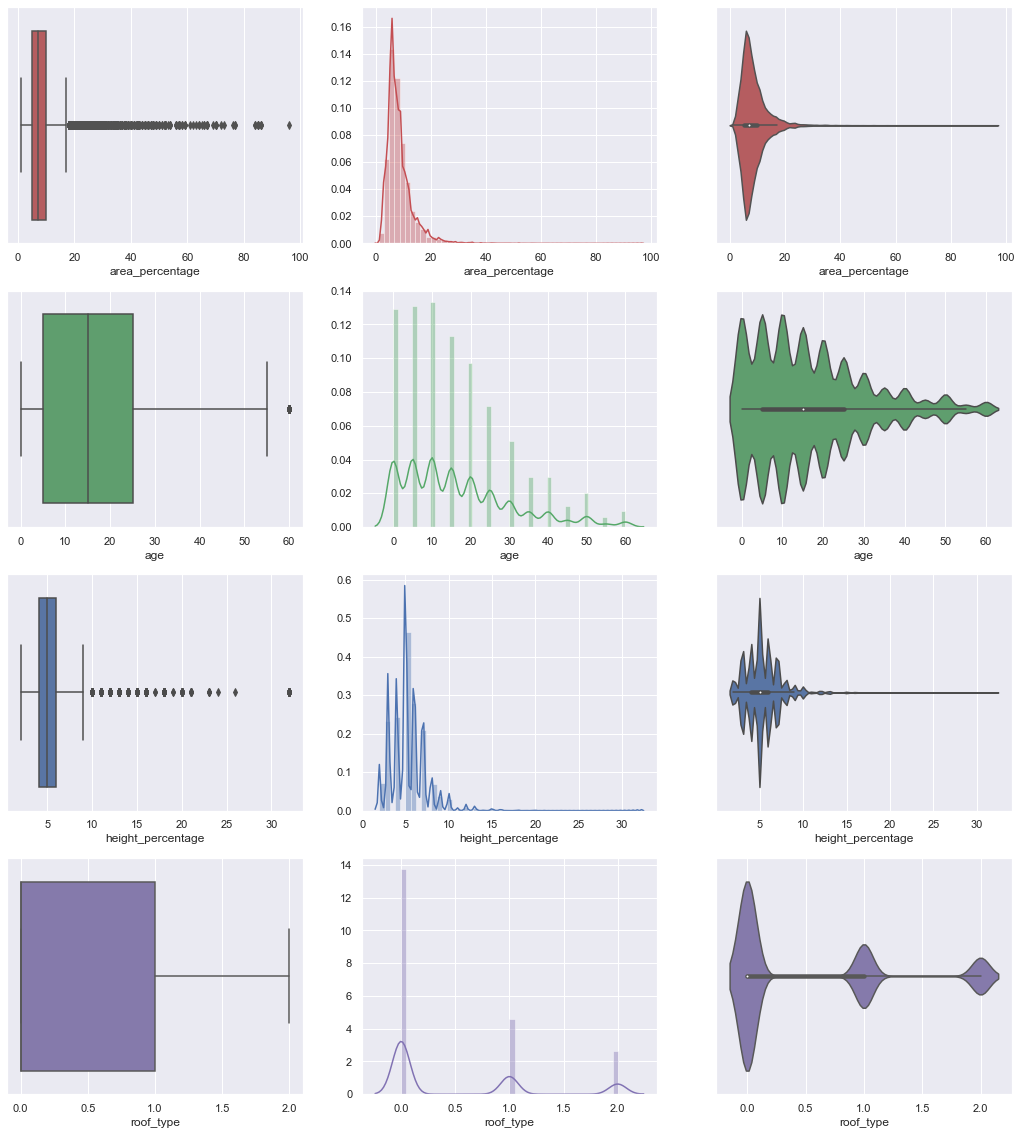

In [59]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m"]

count = 0
for var in spredictors:
    sb.boxplot(spredictors[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(spredictors[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(spredictors[var], color = colors[count], ax = axes[count,2])
    count += 1

## When Damage Grade = 1

In [60]:
# analyse sample data with damage grade = 1
sdata1 = spredictors[spredictors['damage_grade']==1]
s1dg = pd.DataFrame(sdata1['damage_grade'].astype('category'))
sdata1.head()

,area_percentage,age,height_percentage,roof_type,damage_grade
55451,3,0,2,1,1
62055,6,25,5,0,1
52166,5,5,5,0,1
59543,10,0,3,2,1
59327,7,0,5,0,1


In [61]:
# describing the data for those related to Damage Grade 1
drop1 = ['damage_grade']
sdata1 = pd.DataFrame(sdata1.drop(drop1, axis = 1))
sdata1.describe()

,area_percentage,age,height_percentage,roof_type
count,24690.000000,24690.000000,24690.000000,24690.000000
mean,9.723532,9.913325,5.148724,0.770028
std,6.300117,10.657084,2.515358,0.889410
min,1.000000,0.000000,2.000000,0.000000
25%,6.000000,0.000000,3.000000,0.000000
50%,8.000000,5.000000,5.000000,0.000000
75%,12.000000,15.000000,6.000000,2.000000
max,96.000000,60.000000,24.000000,2.000000


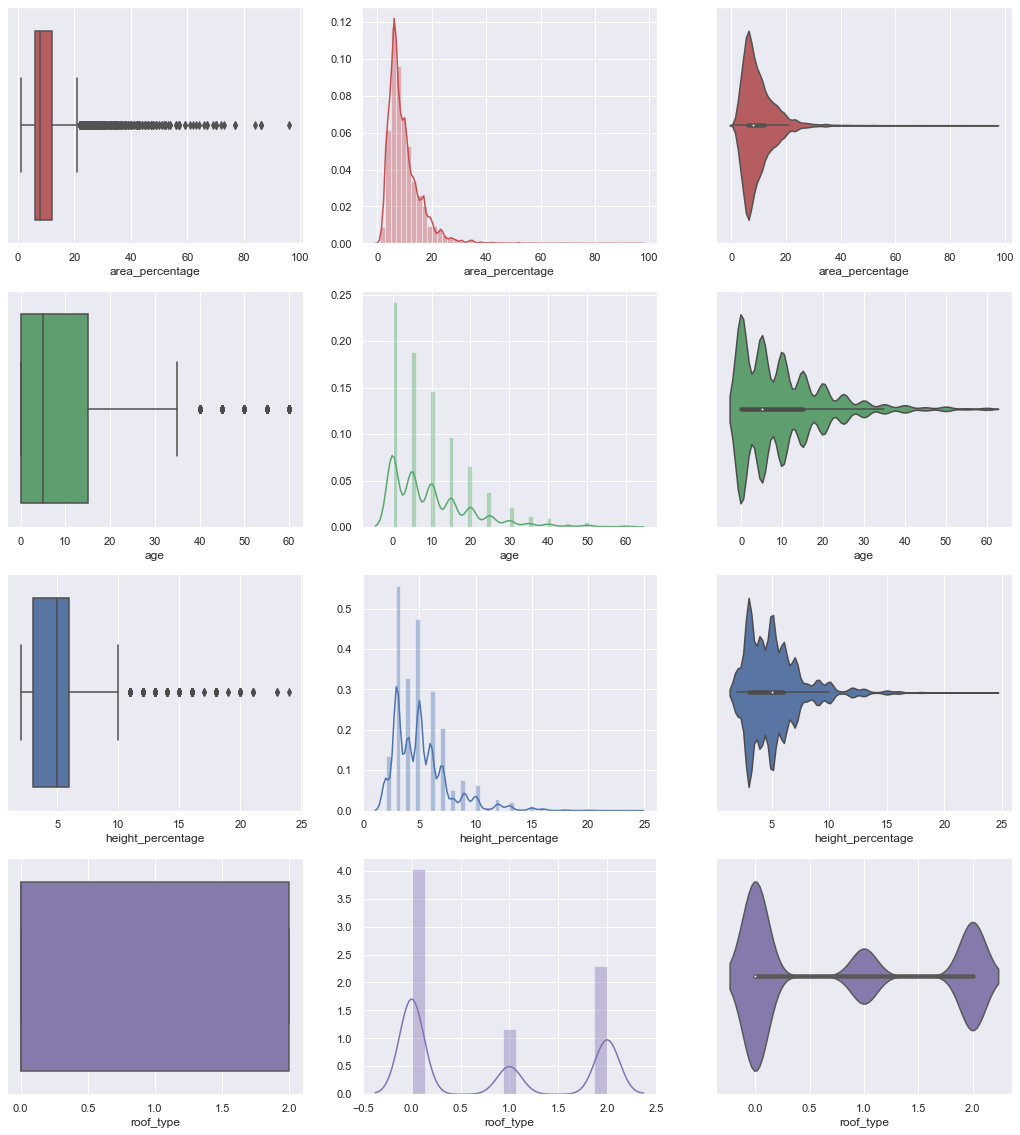

In [62]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m"]

count = 0
for var in sdata1:
    sb.boxplot(sdata1[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(sdata1[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(sdata1[var], color = colors[count], ax = axes[count,2])
    count += 1

## Findings: Damage Grade 1
As shown under Damage Grade 1, 75% of area that contributed to the damage grade was 12% of the area, less than 15 years old, 6% of the height, and 2 with regards to the roof type. Most of the factors were in between 6% to 12% in area, 0 to 15 years old, 3%-6% in height and 0 to 2 for roof type.

## When Damage Grade = 2

In [63]:
# analyse sample data with damage grade = 2
sdata2 = spredictors[spredictors['damage_grade']==2]
s2dg = pd.DataFrame(sdata2['damage_grade'].astype('category'))
sdata2.head()

,area_percentage,age,height_percentage,roof_type,damage_grade
30017,2,30,7,0,2
45874,7,20,6,0,2
25465,3,5,6,0,2
32169,8,5,6,0,2
37014,8,25,7,0,2


In [64]:
# describing the data for those related to Damage Grade 2
drop2 = ['damage_grade']
sdata2 = pd.DataFrame(sdata2.drop(drop2, axis = 1))
sdata2.describe()

,area_percentage,age,height_percentage,roof_type
count,23693.000000,23693.000000,23693.000000,23693.000000
mean,8.050817,19.001604,5.359684,0.343139
std,4.210699,14.098206,1.760389,0.580229
min,1.000000,0.000000,2.000000,0.000000
25%,6.000000,10.000000,4.000000,0.000000
50%,7.000000,15.000000,5.000000,0.000000
75%,10.000000,25.000000,6.000000,1.000000
max,85.000000,60.000000,23.000000,2.000000


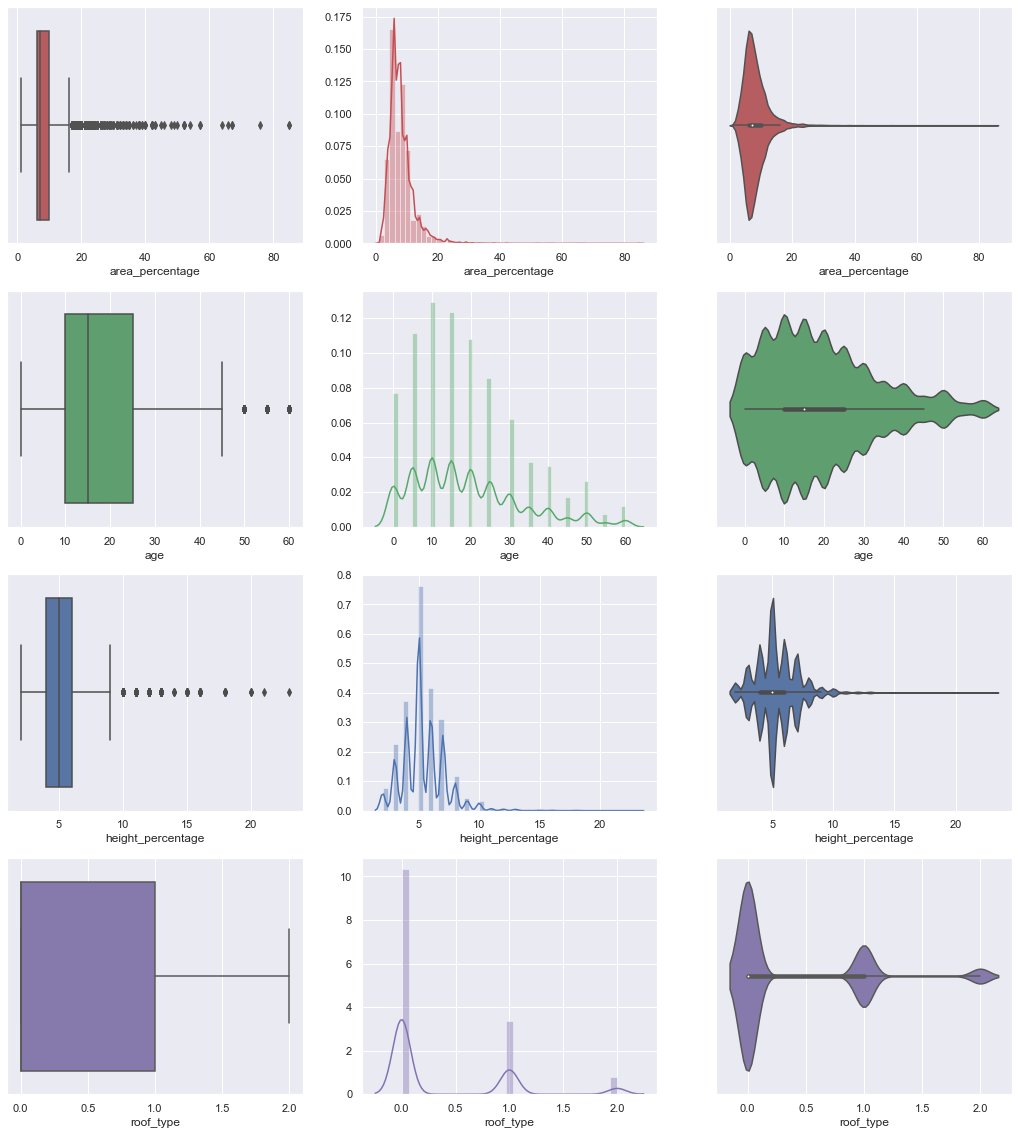

In [65]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m"]

count = 0
for var in sdata2:
    sb.boxplot(sdata2[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(sdata2[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(sdata2[var], color = colors[count], ax = axes[count,2])
    count += 1

## Findings: Damage Grade 2
However, for Damage Grade 2, there was a slight decrease in the area that contributed to the damage grade of 9% of the area, less than 25 years old, 6% of the height, and 1 with regards to the roof type. Most of the factors were in between 6% to 9% in area, 10 to 25 years old, 4%-6% in height and 0 to 1 for roof type.

## When Damage Grade = 3

In [66]:
# analyse sample data with damage grade = 3
sdata3 = spredictors[spredictors['damage_grade']==3]
s3dg = pd.DataFrame(sdata3['damage_grade'].astype('category'))
sdata3.head()

,area_percentage,age,height_percentage,roof_type,damage_grade
511,7,15,4,1,3
2552,10,45,7,0,3
24055,3,15,3,0,3
15856,4,15,4,0,3
10940,5,20,5,0,3


In [67]:
# describing the data for those related to Damage Grade 3
drop3 = ['damage_grade']
sdata3 = pd.DataFrame(sdata3.drop(drop3, axis = 1))
sdata3.describe()

,area_percentage,age,height_percentage,roof_type
count,23679.000000,23679.000000,23679.000000,23679.000000
mean,7.489210,20.470248,5.469319,0.290299
std,3.760421,14.201646,1.856034,0.472957
min,1.000000,0.000000,2.000000,0.000000
25%,5.000000,10.000000,5.000000,0.000000
50%,7.000000,20.000000,5.000000,0.000000
75%,9.000000,30.000000,6.000000,1.000000
max,85.000000,60.000000,32.000000,2.000000


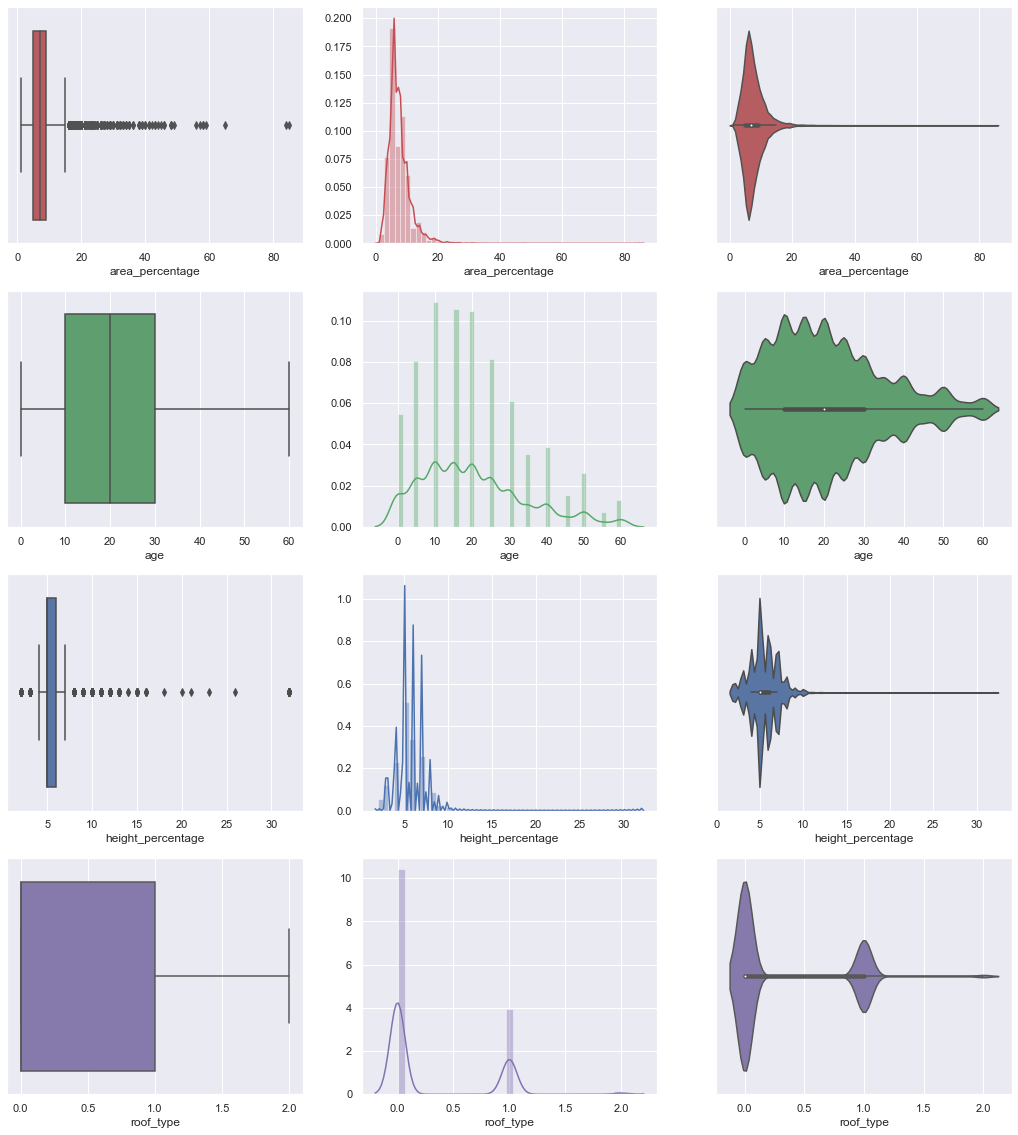

In [68]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m"]

count = 0
for var in sdata3:
    sb.boxplot(sdata3[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(sdata3[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(sdata3[var], color = colors[count], ax = axes[count,2])
    count += 1

## Findings: Damage Grade 3
Lastly for Damage Grade 3, 75% of area that contributed to the damage grade was 9% of the area, less than 30 years old, 6% of the height, and 1 with regards to the roof type. Most of the factors were in between 5% to 9% in area, 10 to 30 years old, 4%-6% in height and 0 to 1 for roof type.

## Overall

In [69]:
# seeing the correlation for all
spredictors1.corr()

,area_percentage,age,height_percentage,roof_type,damage_grade
area_percentage,1.000000,-0.071399,0.232554,0.382957,-0.183705
age,-0.071399,1.000000,0.133664,-0.161128,0.313099
height_percentage,0.232554,0.133664,1.000000,0.236948,0.063194
roof_type,0.382957,-0.161128,0.236948,1.000000,-0.278821
damage_grade,-0.183705,0.313099,0.063194,-0.278821,1.000000


In [70]:
spdg = spredictors1['damage_grade']
droppdg = ['damage_grade']
spredictors1 = pd.DataFrame(spredictors1.drop(droppdg, axis = 1))

In [71]:
tree1 = DecisionTreeClassifier().fit(spredictors1, spdg)
results1 = list(zip(spredictors1, tree.feature_importances_))
importance1 = pd.DataFrame(results1, columns = ["Feature", "Importance"])
importance1 = importance1.sort_values(by="Importance", ascending=False)
importance1

,Feature,Importance
0,area_percentage,0.212615
1,age,0.193400
2,height_percentage,0.154482
3,roof_type,0.108534


## Findings: Overall
All in all, after taking into consideration for damage grade, with age less than 60, roof type can be seen to have the highest importance level at 0.409 as compared to the other factors like age and area at 0.247 and 0.186 respectively.

---
## Third Model : Random Forest
Predictor Feature : All variables except for 'building_id' and 'damage_grade'.

A random forest consists of a large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models. The class with the most number of votes will be used a the model's prediction.

Here we’ll provide two reasons why random forests outperform single decision trees:

### Higher resolution in the feature space
Trees are unpruned. While a single decision tree(our first and second model) is often pruned, a random forest tree is fully grown and unpruned, and so, naturally, the feature space is split into more and smaller regions.
Trees are diverse. Each random forest tree is learned on a random sample, and at each node, a random set of features are considered for splitting. Both mechanisms create diversity among the trees.

### Handling Overfitting
A single decision tree needs pruning to avoid overfitting while random forest reduce issue of overfitting.

In [72]:
drop_list = ['building_id']
y2 = pd.DataFrame(train_labels['damage_grade'])
X2 = pd.DataFrame(train_data.drop(drop_list, axis=1))

In [73]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y2_train.shape, X2_train.shape)
print("Test Set  :", y2_test.shape, X2_test.shape)

Train Set : (208480, 1) (208480, 38)
Test Set  : (52121, 1) (52121, 38)


In [74]:
from sklearn.ensemble import RandomForestClassifier


# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, n_jobs = -1, min_samples_leaf=5, oob_score = True)  # create the object
rforest.fit(X2_train, y2_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
y2_train_pred = rforest.predict(X2_train)
y2_test_pred = rforest.predict(X2_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7828232924021489

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7224343354885746

F1 Score 	: 0.7224343354885745


(3.0, 0.0)

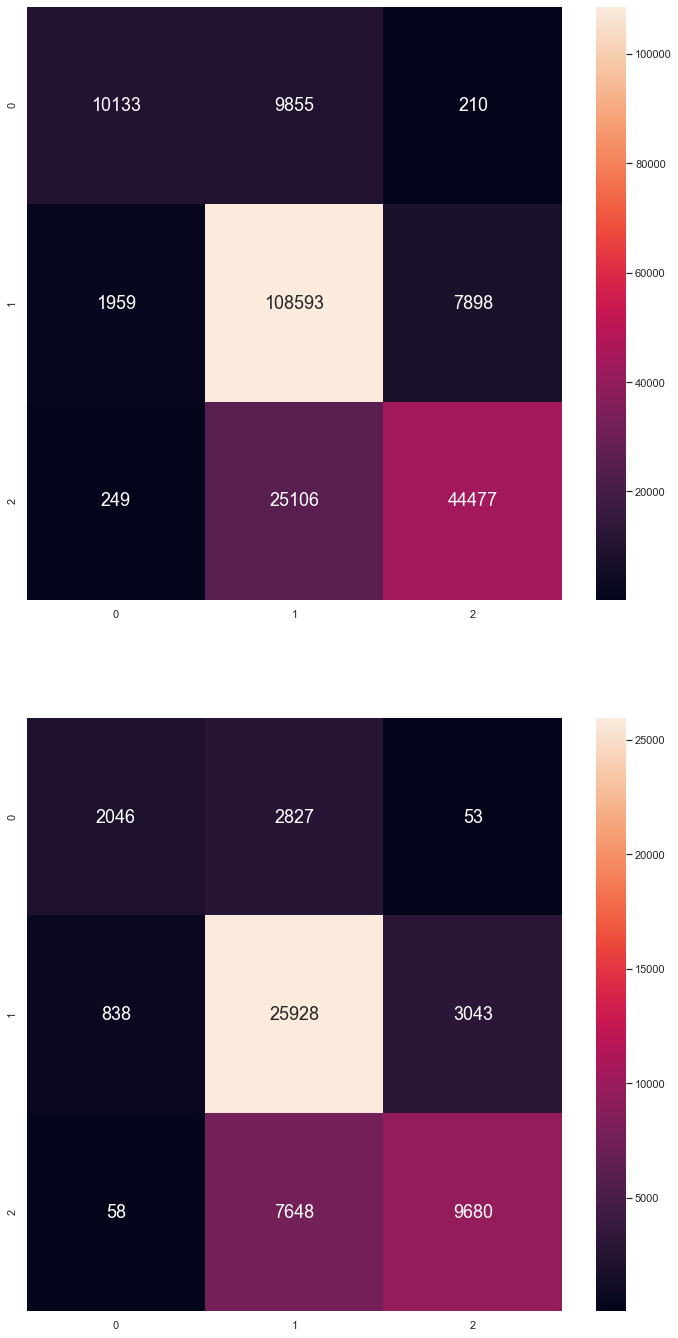

In [75]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X2_train, y2_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X2_test, y2_test))
print()
print("F1 Score \t:", f1_score(y2_test, y2_test_pred, average='micro'))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
ax = sb.heatmap(confusion_matrix(y2_train, y2_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
bx = sb.heatmap(confusion_matrix(y2_test, y2_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = bx.get_ylim()
bx.set_ylim(bottom + 0.5, top - 0.5)

# Gaussian Naive Bayes
A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [76]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X2_train,y2_train.values.ravel())
y2_pred = gnb.predict(X2_test)

In [77]:
from sklearn import metrics
print("Accuracy Score:",metrics.accuracy_score(y2_test,y2_pred))

Accuracy Score: 0.4290209320619328


# AdaBoost
Adaptive boosting (AdaBoost) combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method and it builds a strong classifier by combining multiple poorly performing classifiers into one.

In [78]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X2_train, y2_train.values.ravel())
y2_pred = ab.predict(X2_test)

In [79]:
from sklearn import metrics
print("Accuracy Score:",metrics.accuracy_score(y2_test,y2_pred))

Accuracy Score: 0.6468793768346731


In [80]:
tree = DecisionTreeClassifier().fit(X2, y2)
results = list(zip(X2, tree.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
importance.head(10)

,Feature,Importance
0,geo_level_1_id,0.155983
4,age,0.135430
2,geo_level_3_id,0.129792
5,area_percentage,0.125337
1,geo_level_2_id,0.119838
6,height_percentage,0.058108
15,has_superstructure_mud_mortar_stone,0.029758
12,position,0.028460
26,count_families,0.027129
9,roof_type,0.020813


In [81]:
pred_data = X2_test.iloc[0:5]

In [82]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(pred_data)

y_pred = rforest.predict(X_pred)
print(y_pred)

[2 2 3 2 2]


In [83]:
pred_data_with_id = pd.concat([train_data[["building_id"]], pred_data], axis = 1)
pred_data_with_id = pred_data_with_id.dropna()
pred_data_with_id = pred_data_with_id.astype(int)
actual_grade = train_labels[train_labels["building_id"].isin(pred_data_with_id["building_id"])]
actual_grade

,building_id,damage_grade
13656,470523,3
16163,619964,3
46172,195799,2
98980,327721,3
101599,882197,2


In [84]:
y_pred = pd.DataFrame(y_pred, columns = ["Predicted_Damage_Grade"], index = actual_grade.index)
actual_data = pd.concat([pred_data_with_id["building_id"],actual_grade["damage_grade"], y_pred], axis = 1)
actual_data.dropna()
actual_data = actual_data.astype(int)
actual_data

,building_id,damage_grade,Predicted_Damage_Grade
13656,470523,3,2
16163,619964,3,2
46172,195799,2,3
98980,327721,3,2
101599,882197,2,2


In [85]:
y_prob = rforest.predict_proba(X_pred)
np.set_printoptions(precision = 3)
print(y_prob)

[[0.054 0.524 0.422]
 [0.004 0.588 0.409]
 [0.008 0.219 0.773]
 [0.033 0.854 0.113]
 [0.244 0.68  0.076]]


# XGBoost 

In [98]:
import xgboost as xgb

In [99]:
predictors = ["geo_level_1_id", "geo_level_2_id", "age", "height_percentage", "ground_floor_type", "has_superstructure_cement_mortar_brick", "count_families", "has_superstructure_rc_engineered", 'roof_type']
y = pd.DataFrame(train_labels["damage_grade"].astype('category'))
X = pd.DataFrame(train_data[predictors])
XB_train, XB_test, yb_train, yb_test = train_test_split(X, y, test_size = 0.2)

In [100]:
model1 = xgb.XGBClassifier()
train_model1 = model1.fit(XB_train, yb_train)

In [101]:
from sklearn.metrics import accuracy_score

pred1 = model1.predict(XB_test)

In [102]:
print("Accuracy for model 1: %.2f" % (accuracy_score(yb_test, pred1) * 100))

Accuracy for model 1: 71.59


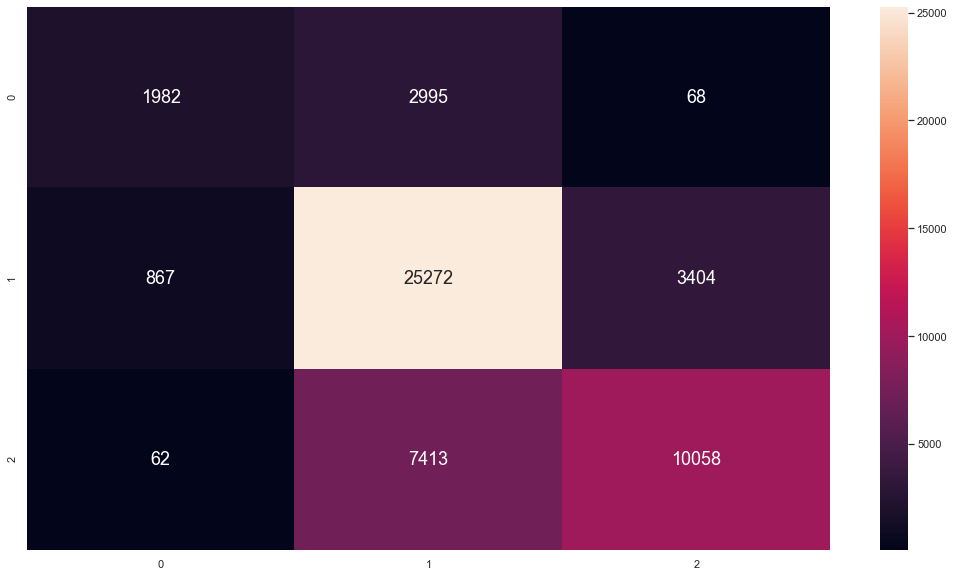

In [103]:
plt.figure(figsize=(18,10))
ax = sb.heatmap(confusion_matrix(yb_test, pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [104]:
pred_data = XB_test.iloc[0:5]

In [105]:
pred_data

,geo_level_1_id,geo_level_2_id,age,height_percentage,ground_floor_type,has_superstructure_cement_mortar_brick,count_families,has_superstructure_rc_engineered,roof_type
20313,4,821,20,3,0,0,1,0,0
50826,3,175,80,8,0,0,1,0,0
50431,11,765,55,4,0,0,1,0,0
56914,4,212,30,4,0,0,0,0,0
140362,20,158,5,5,2,1,1,0,2


In [106]:
X_pred = pd.DataFrame(pred_data)

y_pred = model1.predict(X_pred)
print(y_pred)

[2 2 3 2 2]


In [107]:
pred_data_with_id = pd.concat([train_data[["building_id"]], pred_data], axis = 1)
pred_data_with_id = pred_data_with_id.dropna()
pred_data_with_id = pred_data_with_id.astype(int)
actual_grade = train_labels[train_labels["building_id"].isin(pred_data_with_id["building_id"])]
actual_grade

,building_id,damage_grade
20313,778811,2
50431,681131,3
50826,552235,3
56914,452023,2
140362,703936,2


In [108]:
y_pred = pd.DataFrame(y_pred, columns = ["Predicted_Damage_Grade"], index = actual_grade.index)
actual_data = pd.concat([pred_data_with_id["building_id"],actual_grade["damage_grade"], y_pred], axis = 1)
actual_data.dropna()
actual_data = actual_data.astype(int)
actual_data

,building_id,damage_grade,Predicted_Damage_Grade
20313,778811,2,2
50431,681131,3,2
50826,552235,3,3
56914,452023,2,2
140362,703936,2,2


In [109]:
y_prob = model1.predict_proba(X_pred)
np.set_printoptions(precision = 3)
print(y_prob)

[[0.02  0.733 0.247]
 [0.003 0.793 0.205]
 [0.004 0.398 0.598]
 [0.015 0.814 0.17 ]
 [0.334 0.644 0.022]]


# Conclusion

## Accuracy Score
1. Binary Tree Classification - 0.6593
2. Random Forest Classification - 0.7203
3. Naive Bayes Classification - 0.4314
4. AdaBoost Classification - 0.6418
5. XGBoost Classification - 0.716

Hence, based on the accuracy score, it is good that we can conlude that using random forest classification will be a good guage to calculate accuracy.